In [57]:
# ============================================
# STEP 1: IMPORT LIBRARIES
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from imblearn.over_sampling import SMOTE



In [44]:
# ============================================
# STEP 2: LOAD DATASET
# ============================================

# Upload your dataset
df = pd.read_csv('/content/creditcard.csv')

df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
# ============================================
# STEP 3: DATA INSPECTION
# ============================================

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [46]:
# ============================================
# STEP 4: SPLIT FEATURES (X) AND TARGET (y)
# ============================================

X = df.drop("Class", axis=1)
y = df["Class"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (284807, 30)
y shape: (284807,)


In [47]:
# ============================================
# STEP 5: TRAIN-TEST SPLIT
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (227845, 30)
Testing set: (56962, 30)


In [48]:
# ============================================
# STEP 6: FEATURE SCALING (NORMALIZATION)
# ============================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete.")


Scaling complete.


In [49]:
# ============================================
# STEP 7: HANDLE CLASS IMBALANCE USING SMOTE
# ============================================

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [50]:
# ============================================
# STEP 8: TRAIN LOGISTIC REGRESSION MODEL
# ============================================

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test_scaled)

print("LOGISTIC REGRESSION PERFORMANCE:\n")
print(classification_report(y_test, y_pred_lr))



LOGISTIC REGRESSION PERFORMANCE:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [51]:
# ============================================
# STEP 9: TRAIN RANDOM FOREST MODEL
# ============================================

rf = RandomForestClassifier(
    n_estimators=40,
    max_depth=8,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("RANDOM FOREST PERFORMANCE:\n")
print(classification_report(y_test, y_pred_rf))


RANDOM FOREST PERFORMANCE:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



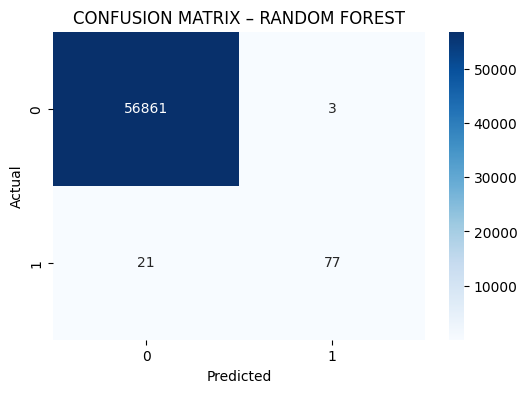

In [18]:
# ============================================
# STEP 10: CONFUSION MATRIX VISUALIZATION
# ============================================

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("CONFUSION MATRIX – RANDOM FOREST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [76]:
# ============================================
# STEP 11: FRAUD DETECTION
# ============================================

import random

# User input
time = float(input("Enter Time: "))
amount = float(input("Enter Amount: "))

# Sample realistic values
fraud_rows = df[df['Class'] == 1]
normal_rows = df[df['Class'] == 0]

use_fraud = random.choice([True, False])

if use_fraud:
    sample_row = fraud_rows.sample(1).iloc[0]
else:
    sample_row = normal_rows.sample(1).iloc[0]

# Extract only V1-V28
v_features = list(sample_row[1:29])
input_data = [time] + v_features + [amount]  # 30 elements

# Create DataFrame with correct column names
manual_df = pd.DataFrame([input_data], columns=['Time'] + [f'V{i}' for i in range(1,29)] + ['Amount'])

# Scale and predict
manual_scaled = scaler.transform(manual_df)
pred = rf.predict(manual_scaled)[0]

print("\nPrediction:", "FRAUD" if pred == 1 else "NOT FRAUD")


Enter Time: 26
Enter Amount: 1.96

Prediction: FRAUD
